# Task B - 3D Linear Regression 

In [1]:
import torch 
import torch.nn as nn 

import pandas as pd 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv('data/day_length_weight.csv').values

In [3]:
x_train = torch.tensor(data[:, 1:3], dtype=torch.float32).reshape(-1, 2)
y_train = torch.tensor(data[:, 0], dtype=torch.float32).reshape(-1, 1)

In [4]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        return self.linear(x)

In [5]:
model = Model(2, 1)

In [6]:
learning_rate = 0.0001
epochs = 250000

In [7]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [8]:
loss = 0 
losses = []

In [9]:
 for i in range(epochs):
    y_pred = model.forward(x_train)

    loss = criterion(y_pred, y_train)
    losses.append(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    i += 1

## Loss graph

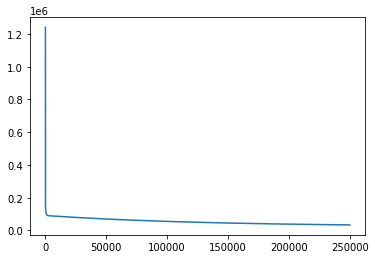

In [10]:
plt.plot(range(epochs), losses)

## Optimization result

In [11]:
W1 = model.linear.weight[0, 0]
W2 = model.linear.weight[0, 1]
b = model.linear.bias.item()

print(f'W1: {W1}, W2: {W2}, b: {b}, loss: {loss}')

W1: 15.261778831481934, W2: 56.2919807434082, b: -1159.15234375, loss: 33525.2109375


## Optimization graph

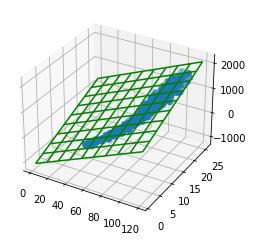

In [12]:
fig = plt.figure('Linear regression: 3D')
plot = fig.add_subplot(111, projection='3d')

# Draws test data (points)
plot.scatter(x_train[:, 0], x_train[:, 1], y_train)

# Initializes the x-grids
x1_grid, x2_grid = torch.meshgrid(torch.linspace(1, torch.max(x_train[:, 0] + 1), 10), torch.linspace(1, torch.max(x_train[:, 1] + 1), 10))

# Initializes the corresponding y-grid
y_grid = torch.empty([10, 10])
for i in range(0, x1_grid.shape[0]):
    for j in range(0, x1_grid.shape[1]):
            x_plot = torch.FloatTensor([[x1_grid[i, j], x2_grid[i, j]]])
            y_grid[i, j] = model.forward(x_plot)

plot_f = plot.plot_wireframe(x1_grid.detach(), x2_grid.detach(), y_grid.detach(), color='green')
